In [103]:
%%time

import numpy as np
import pandas as pd
import seaborn as sb

chi = pd.read_csv("chi.csv")

chi.info()
chi


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Date                  object
 1   Primary Type          object
 2   Location Description  object
 3   Arrest                bool  
 4   Beat                  int64 
 5   District              int64 
 6   Ward                  int64 
 7   Community Area        int64 
 8   Year                  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 356.7+ MB
Wall time: 9.75 s


,Date,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,Year
0,07/26/2001 06:00:00 PM,MOTOR VEHICLE THEFT,STREET,False,723,7,16,68,2001
1,09/02/2001 06:00:00 PM,DECEPTIVE PRACTICE,PARK PROPERTY,False,932,9,16,61,2001
2,08/17/2001 05:30:00 AM,MOTOR VEHICLE THEFT,STREET,False,821,8,14,58,2001
3,07/09/2001 04:30:00 PM,DECEPTIVE PRACTICE,CURRENCY EXCHANGE,True,1623,16,45,11,2001
4,08/15/2001 11:30:00 PM,BURGLARY,RESTAURANT,True,1925,19,46,6,2001
...,...,...,...,...,...,...,...,...,...
5755034,01/18/2021 05:45:00 PM,DECEPTIVE PRACTICE,RESIDENCE,False,1111,11,37,23,2021
5755035,01/18/2021 10:17:00 AM,THEFT,OTHER (SPECIFY),False,2221,22,21,73,2021
5755036,01/18/2021 09:30:00 PM,ROBBERY,SIDEWALK,False,1211,12,1,24,2021
5755037,01/18/2021 01:04:00 AM,OTHER OFFENSE,STREET,True,131,1,3,33,2021


In [2]:
%%time
# pd.show_versions()

test2 = chi.iloc[:, [4,5,6,7]] # group attributes as Places
# test2 = test2.astype('float')

test2.info()                # data summary
display(test2)              # data reference
display(test2.cov())        # covariance matrix
display(test2.cov().corr()) # displays 10 pairs correlation

#Note to Self:
#In a negative correlation, the variables move in inverse, or opposite, directions. In other words,
# as one variable increases, the other variable decreases. ... When two variables have a positive
# correlation, it means the variables move in the same direction. This means that as one variable
# increases, so does the other one (www.simplypsychology.org).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 4 columns):
 #   Column          Dtype
---  ------          -----
 0   Beat            int64
 1   District        int64
 2   Ward            int64
 3   Community Area  int64
dtypes: int64(4)
memory usage: 175.6 MB


,Beat,District,Ward,Community Area
0,723,7,16,68
1,932,9,16,61
2,821,8,14,58
3,1623,16,45,11
4,1925,19,46,6
...,...,...,...,...
5755034,1111,11,37,23
5755035,2221,22,21,73
5755036,1211,12,1,24
5755037,131,1,3,33


,Beat,District,Ward,Community Area
Beat,495521.896866,4638.385398,6275.906152,-7622.372458
District,4638.385398,48.415767,66.560283,-74.533884
Ward,6275.906152,66.560283,196.378222,-160.212530
Community Area,-7622.372458,-74.533884,-160.212530,466.010943


,Beat,District,Ward,Community Area
Beat,1.000000,0.999998,0.999716,-0.998905
District,0.999998,1.000000,0.999759,-0.998997
Ward,0.999716,0.999759,1.000000,-0.999597
Community Area,-0.998905,-0.998997,-0.999597,1.000000


Wall time: 811 ms


In [3]:
%%time

print(chi['Primary Type'].unique())
print(chi.nunique())

['MOTOR VEHICLE THEFT' 'DECEPTIVE PRACTICE' 'BURGLARY' 'HOMICIDE'
 'SEX OFFENSE' 'OFFENSE INVOLVING CHILDREN' 'CRIMINAL TRESPASS' 'BATTERY'
 'ROBBERY' 'THEFT' 'CRIM SEXUAL ASSAULT' 'OTHER OFFENSE' 'CRIMINAL DAMAGE'
 'ASSAULT' 'INTIMIDATION' 'WEAPONS VIOLATION' 'ARSON'
 'PUBLIC PEACE VIOLATION' 'CRIMINAL SEXUAL ASSAULT' 'NARCOTICS'
 'PROSTITUTION' 'LIQUOR LAW VIOLATION' 'GAMBLING' 'KIDNAPPING'
 'INTERFERENCE WITH PUBLIC OFFICER' 'STALKING' 'RITUALISM' 'OBSCENITY'
 'PUBLIC INDECENCY' 'OTHER NARCOTIC VIOLATION' 'NON-CRIMINAL'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'HUMAN TRAFFICKING' 'NON - CRIMINAL'
 'CONCEALED CARRY LICENSE VIOLATION']
Date                    2434725
Primary Type                 35
Location Description        214
Arrest                        2
Beat                        303
District                     24
Ward                         50
Community Area               78
Year                         21
dtype: int64
Wall time: 7.15 s


In [4]:
%%time

chi['Primary Type'] = chi['Primary Type'].replace(['MOTOR VEHICLE THEFT','BURGLARY','HOMICIDE',
 'SEX OFFENSE','OFFENSE INVOLVING CHILDREN','ROBBERY','THEFT','CRIM SEXUAL ASSAULT','INTIMIDATION',
 'ARSON','CRIMINAL SEXUAL ASSAULT','NARCOTICS','KIDNAPPING','STALKING','RITUALISM',
 'OTHER NARCOTIC VIOLATION','HUMAN TRAFFICKING'], 1)

chi['Primary Type'] = chi['Primary Type'].replace(['DECEPTIVE PRACTICE','CRIMINAL TRESPASS','BATTERY',
 'OTHER OFFENSE','CRIMINAL DAMAGE','ASSAULT','WEAPONS VIOLATION','PUBLIC PEACE VIOLATION',
 'PROSTITUTION','LIQUOR LAW VIOLATION','GAMBLING','INTERFERENCE WITH PUBLIC OFFICER','OBSCENITY',
 'PUBLIC INDECENCY','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)',
 'NON - CRIMINAL','CONCEALED CARRY LICENSE VIOLATION'], 2)

print(chi['Primary Type'].unique())
print(chi.nunique())


[1 2]
Date                    2434725
Primary Type                  2
Location Description        214
Arrest                        2
Beat                        303
District                     24
Ward                         50
Community Area               78
Year                         21
dtype: int64
Wall time: 14.3 s


In [5]:
%%time

chi.info()
chi.pop('Date')
chi.pop('Location Description')
chi.pop('District')
chi.pop('Ward')
chi.pop('Community Area')
chi.pop('Year')

chi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Date                  object
 1   Primary Type          int64 
 2   Location Description  object
 3   Arrest                bool  
 4   Beat                  int64 
 5   District              int64 
 6   Ward                  int64 
 7   Community Area        int64 
 8   Year                  int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 356.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 3 columns):
 #   Column        Dtype
---  ------        -----
 0   Primary Type  int64
 1   Arrest        bool 
 2   Beat          int64
dtypes: bool(1), int64(2)
memory usage: 93.3 MB
Wall time: 646 ms


In [6]:
%%time

print(chi['Arrest'].unique())

# chi['Arrest'] = chi['Arrest'].replace(['False'], 0)
# chi['Arrest'] = chi['Arrest'].replace(['True'], 1)
# chi['Arrest'] = chi['Arrest'].astype(int)
chi = chi.astype(int)

print(chi['Arrest'].unique())
print(chi.nunique())
print(chi.info())

[False  True]
[0 1]
Primary Type      2
Arrest            2
Beat            303
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 3 columns):
 #   Column        Dtype
---  ------        -----
 0   Primary Type  int32
 1   Arrest        int32
 2   Beat          int32
dtypes: int32(3)
memory usage: 65.9 MB
None
Wall time: 661 ms


In [7]:
%%time

print(chi['Beat'].unique())
print(chi.nunique())

display(chi.describe(include='all'))  # include='all'
display(chi)

[ 723  932  821 1623 1925 2531  934 1424 1034  823  511 2223 1711 1731
  611 2521 2323  431  132  835 1831  124 2515  113 2523  523  322 1434
  734 1122  913 1313 1651 1532  634 2522 1622 1813 2534 1531 2213 1112
 2022  834 1115  424  411 1533 1814  614 1824 1421  921 1713 1222 1111
 1121 1512  612  134  423 2411 2232 2011 1433 1123 1324 2525 1634 2133
 1031 1722  633 1912  433 2431 1024  632 1522  332  211 2234 2535  833
 1832  513  215 2233  422  532 1732 2513  832  223 1624 1224  122 1733
  935  631  724 1913 1834 1821  512 1233  313 1712 1511 1033  232 2512
 1933 2122 1113 2023  732  813 1723 1724 1134  212  323  733  421 1833
  922 1413 1523  214  531 1232  224 1132  414 1114  915  825 2124 1211
 1013 1811 1022  824 1633  233 1331 2222 1614 1423 1524  731 2412 2333
  711 2524 2532  123 2533 1032 2013 1513 2123 1632  712  324 1311  911
 1432  413 2032  713 2332 1611 1012  912  815 2433 1125  715 1124 1135
  321  714 2112  931  831 1312  914  333 1231  814 2324  524  722 2212
  331 

,Primary Type,Arrest,Beat
count,5.755039e+06,5.755039e+06,5.755039e+06
mean,1.467536e+00,2.804895e-01,1.197212e+03
std,4.989450e-01,4.492384e-01,7.039332e+02
min,1.000000e+00,0.000000e+00,1.110000e+02
25%,1.000000e+00,0.000000e+00,6.230000e+02
50%,1.000000e+00,0.000000e+00,1.112000e+03
75%,2.000000e+00,1.000000e+00,1.733000e+03
max,2.000000e+00,1.000000e+00,2.535000e+03


,Primary Type,Arrest,Beat
0,1,0,723
1,2,0,932
2,1,0,821
3,2,1,1623
4,1,1,1925
...,...,...,...
5755034,2,0,1111
5755035,1,0,2221
5755036,1,0,1211
5755037,2,1,131


Wall time: 932 ms


In [8]:
# %%time

# sb.pairplot(chi) 


Wall time: 751 ms


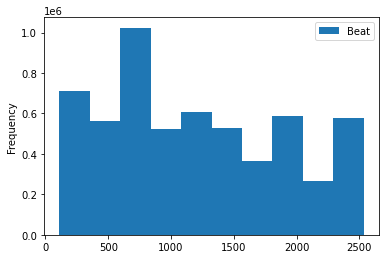

In [9]:
%%time

chi.loc[:,['Beat']].plot(kind='hist')


Wall time: 352 ms


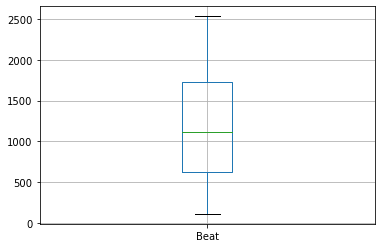

In [10]:
%%time

chi.boxplot(column='Beat')


In [11]:
%%time

chi.groupby('Primary Type')['Arrest'].mean()

# misdemeanors slightly outperform felonies in regards to avoiding arrest (0=F, 1=T for arrest made)


Wall time: 339 ms


Primary Type
1    0.297819
2    0.260754
Name: Arrest, dtype: float64

In [12]:
%%time

from sklearn.model_selection import train_test_split
        
X = chi.iloc[:, [0,2]]
y = chi.iloc[:, [1]]

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)#, stratify=y)


Wall time: 1.28 s


In [13]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
# from sklearn.metrics import confusion_matrix


Wall time: 171 ms


In [14]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10) # cv=kfold
print('DT Scores: ', scores, "\n")

DT Scores:  [0.72459681 0.72405319 0.72453724 0.72421702 0.7245422  0.72397127
 0.72413759 0.72408229 0.72421882 0.72423371] 

Wall time: 1min 1s


In [15]:
%%time

rf = RandomForestClassifier(max_depth=4, random_state=0)

scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=2) 
print('RF Scores: ', scores, "\n")


RF Scores:  [0.72400738 0.72389355] 

Wall time: 6min 41s


In [16]:
%%time

bg = BaggingClassifier()

scores = cross_val_score(bg, X_train, y_train.values.ravel(), cv=3)
print('BG Scores: ', scores, "\n")


BG Scores:  [0.73214218 0.73177857 0.7319007 ] 

Wall time: 3min 10s


In [17]:
%%time

lgr = LogisticRegression(max_iter=1000)

scores = cross_val_score(lgr, X_train, y_train.values.ravel(), cv=10)
print('LGR Scores: ', scores, "\n")


LGR Scores:  [0.71972407 0.71972407 0.71972407 0.71972407 0.71972407 0.71972407
 0.71972159 0.71972337 0.71972337 0.71972337] 

Wall time: 2min 32s


In [18]:
%%time

rdg = RidgeClassifier()

scores = cross_val_score(rdg, X_train, y_train.values.ravel(), cv=10)
print('RDG Scores: ', scores, "\n")


RDG Scores:  [0.71972407 0.71972407 0.71972407 0.71972407 0.71972407 0.71972407
 0.71972159 0.71972337 0.71972337 0.71972337] 

Wall time: 17.6 s


In [19]:
%%time

nb = GaussianNB()

scores = cross_val_score(nb, X_train, y_train.values.ravel(), cv=10)
print('NB Scores: ', scores, "\n")

NB Scores:  [0.71972407 0.71972407 0.71972407 0.71972407 0.71972407 0.71972407
 0.71972159 0.71972337 0.71972337 0.71972337] 

Wall time: 12.8 s


In [20]:
%%time

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123,
                                                      stratify=y) # <============         


Wall time: 58.3 s


In [21]:
%%time

nb = GaussianNB()

scores = cross_val_score(nb, X_train, y_train.values.ravel(), cv=10)
print('NB Scores: ', scores, "\n")

NB Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

Wall time: 13.1 s


In [22]:
%%time

rdg = RidgeClassifier()

scores = cross_val_score(rdg, X_train, y_train.values.ravel(), cv=10)
print('RDG Scores: ', scores, "\n")


RDG Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

Wall time: 18.3 s


In [23]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.7243039  0.72462412 0.72418475 0.72429894 0.72409539 0.72447022
 0.72421702 0.72420393 0.72318122 0.72411208] 

Wall time: 1min 6s


In [24]:
%%time

chi2 = pd.read_csv("chi.csv")

display(chi2.info())

chi2.pop('Date')
chi2.pop('Location Description')
chi2.pop('District')
chi2.pop('Ward')
chi2.pop('Community Area')
chi2.pop('Year')

display(chi2.info())
display(chi2.nunique())
display(chi2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Date                  object
 1   Primary Type          object
 2   Location Description  object
 3   Arrest                bool  
 4   Beat                  int64 
 5   District              int64 
 6   Ward                  int64 
 7   Community Area        int64 
 8   Year                  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 356.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Primary Type  object
 1   Arrest        bool  
 2   Beat          int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 93.3+ MB


None

Primary Type     35
Arrest            2
Beat            303
dtype: int64

,Primary Type,Arrest,Beat
0,MOTOR VEHICLE THEFT,False,723
1,DECEPTIVE PRACTICE,False,932
2,MOTOR VEHICLE THEFT,False,821
3,DECEPTIVE PRACTICE,True,1623
4,BURGLARY,True,1925
...,...,...,...
5755034,DECEPTIVE PRACTICE,False,1111
5755035,THEFT,False,2221
5755036,ROBBERY,False,1211
5755037,OTHER OFFENSE,True,131


Wall time: 12.4 s


In [25]:
%%time

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
chi2[['Beat']] = scaler.fit_transform(chi2[['Beat']])

chi2['Arrest'] = chi2['Arrest'].astype(int)

display(chi2.info())
display(chi2.nunique())
display(chi2)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Primary Type  object 
 1   Arrest        int32  
 2   Beat          float64
dtypes: float64(1), int32(1), object(1)
memory usage: 109.8+ MB


None

Primary Type     35
Arrest            2
Beat            303
dtype: int64

,Primary Type,Arrest,Beat
0,MOTOR VEHICLE THEFT,0,-0.673660
1,DECEPTIVE PRACTICE,0,-0.376757
2,MOTOR VEHICLE THEFT,0,-0.534443
3,DECEPTIVE PRACTICE,1,0.604870
4,BURGLARY,1,1.033888
...,...,...,...
5755034,DECEPTIVE PRACTICE,0,-0.122472
5755035,THEFT,0,1.454383
5755036,ROBBERY,0,0.019587
5755037,OTHER OFFENSE,1,-1.514649


Wall time: 4.49 s


In [26]:
%%time

chi2.groupby('Primary Type')['Arrest'].mean()


Wall time: 789 ms


Primary Type
ARSON                                0.105640
ASSAULT                              0.234022
BATTERY                              0.226699
BURGLARY                             0.055886
CONCEALED CARRY LICENSE VIOLATION    0.966667
CRIM SEXUAL ASSAULT                  0.136124
CRIMINAL DAMAGE                      0.062685
CRIMINAL SEXUAL ASSAULT              0.064276
CRIMINAL TRESPASS                    0.724931
DECEPTIVE PRACTICE                   0.141551
GAMBLING                             0.992500
HOMICIDE                             0.430506
HUMAN TRAFFICKING                    0.093750
INTERFERENCE WITH PUBLIC OFFICER     0.925858
INTIMIDATION                         0.160803
KIDNAPPING                           0.105942
LIQUOR LAW VIOLATION                 0.990114
MOTOR VEHICLE THEFT                  0.084038
NARCOTICS                            0.993846
NON - CRIMINAL                       0.157895
NON-CRIMINAL                         0.058480
NON-CRIMINAL (SUBJECT

In [27]:
%%time

chi2['Primary Type'] = chi2['Primary Type'].replace(['MOTOR VEHICLE THEFT','BURGLARY','HOMICIDE',
 'SEX OFFENSE','OFFENSE INVOLVING CHILDREN','ROBBERY','THEFT','CRIM SEXUAL ASSAULT','INTIMIDATION',
 'ARSON','CRIMINAL SEXUAL ASSAULT','NARCOTICS','KIDNAPPING','STALKING','RITUALISM',
 'OTHER NARCOTIC VIOLATION','HUMAN TRAFFICKING'], 1)

chi2['Primary Type'] = chi2['Primary Type'].replace(['DECEPTIVE PRACTICE','CRIMINAL TRESPASS','BATTERY',
 'OTHER OFFENSE','CRIMINAL DAMAGE','ASSAULT','WEAPONS VIOLATION','PUBLIC PEACE VIOLATION',
 'PROSTITUTION','LIQUOR LAW VIOLATION','GAMBLING','INTERFERENCE WITH PUBLIC OFFICER','OBSCENITY',
 'PUBLIC INDECENCY','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)',
 'NON - CRIMINAL','CONCEALED CARRY LICENSE VIOLATION'], 2)


display(chi2.info())
display(chi2['Primary Type'].unique())
display(chi2.nunique())
chi2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Primary Type  int64  
 1   Arrest        int32  
 2   Beat          float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 109.8 MB


None

array([1, 2], dtype=int64)

Primary Type      2
Arrest            2
Beat            303
dtype: int64

Wall time: 8.18 s


,Primary Type,Arrest,Beat
0,1,0,-0.673660
1,2,0,-0.376757
2,1,0,-0.534443
3,2,1,0.604870
4,1,1,1.033888
...,...,...,...
5755034,2,0,-0.122472
5755035,1,0,1.454383
5755036,1,0,0.019587
5755037,2,1,-1.514649


In [28]:
%%time

X = chi2.iloc[:, [0,2]]
y = chi2.iloc[:, [1]]

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123,
                                                      stratify=y)

Wall time: 1min 3s


In [29]:
%%time

nb = GaussianNB()

scores = cross_val_score(nb, X_train, y_train.values.ravel(), cv=10)
print('NB Scores: ', scores, "\n")

NB Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

Wall time: 14.4 s


In [30]:
%%time

rdg = RidgeClassifier()

scores = cross_val_score(rdg, X_train, y_train.values.ravel(), cv=10)
print('RDG Scores: ', scores, "\n")

RDG Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

Wall time: 17.9 s


In [31]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.7243039  0.72462412 0.72418475 0.72429894 0.72409539 0.72447022
 0.72421702 0.72420393 0.72318122 0.72411208] 

Wall time: 1min 3s


In [104]:
%%time

chi2 = pd.read_csv("chi.csv")

display(chi2.info())

chi2.pop('Date')
chi2.pop('Location Description')
chi2.pop('District')
chi2.pop('Ward')
chi2.pop('Community Area')
chi2.pop('Year')

display(chi2.info())
display(chi2.nunique())
display(chi2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Date                  object
 1   Primary Type          object
 2   Location Description  object
 3   Arrest                bool  
 4   Beat                  int64 
 5   District              int64 
 6   Ward                  int64 
 7   Community Area        int64 
 8   Year                  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 356.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Primary Type  object
 1   Arrest        bool  
 2   Beat          int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 93.3+ MB


None

Primary Type     35
Arrest            2
Beat            303
dtype: int64

,Primary Type,Arrest,Beat
0,MOTOR VEHICLE THEFT,False,723
1,DECEPTIVE PRACTICE,False,932
2,MOTOR VEHICLE THEFT,False,821
3,DECEPTIVE PRACTICE,True,1623
4,BURGLARY,True,1925
...,...,...,...
5755034,DECEPTIVE PRACTICE,False,1111
5755035,THEFT,False,2221
5755036,ROBBERY,False,1211
5755037,OTHER OFFENSE,True,131


Wall time: 12.5 s


In [105]:
%%time

chi2['Primary Type'] = chi2['Primary Type'].replace(['HOMICIDE'], 1)
chi2['Primary Type'] = chi2['Primary Type'].replace(['CRIMINAL SEXUAL ASSAULT'], 2)
chi2['Primary Type'] = chi2['Primary Type'].replace(['CRIM SEXUAL ASSAULT'], 3)
chi2['Primary Type'] = chi2['Primary Type'].replace(['KIDNAPPING'], 4)
chi2['Primary Type'] = chi2['Primary Type'].replace(['OFFENSE INVOLVING CHILDREN'], 5)
chi2['Primary Type'] = chi2['Primary Type'].replace(['BURGLARY'], 6)
chi2['Primary Type'] = chi2['Primary Type'].replace(['ROBBERY'], 7)
chi2['Primary Type'] = chi2['Primary Type'].replace(['SEX OFFENSE'], 8)
chi2['Primary Type'] = chi2['Primary Type'].replace(['HUMAN TRAFFICKING'], 9)
chi2['Primary Type'] = chi2['Primary Type'].replace(['ARSON'], 10)
chi2['Primary Type'] = chi2['Primary Type'].replace(['RITUALISM'], 11)
chi2['Primary Type'] = chi2['Primary Type'].replace(['MOTOR VEHICLE THEFT'], 12)
chi2['Primary Type'] = chi2['Primary Type'].replace(['THEFT'], 13)
chi2['Primary Type'] = chi2['Primary Type'].replace(['NARCOTICS'], 14)
chi2['Primary Type'] = chi2['Primary Type'].replace(['INTIMIDATION'], 15)
chi2['Primary Type'] = chi2['Primary Type'].replace(['STALKING'], 16)
chi2['Primary Type'] = chi2['Primary Type'].replace(['OTHER NARCOTIC VIOLATION'], 17)
chi2['Primary Type'] = chi2['Primary Type'].replace(['ASSAULT'], 34)
chi2['Primary Type'] = chi2['Primary Type'].replace(['BATTERY'], 35)
chi2['Primary Type'] = chi2['Primary Type'].replace(['DECEPTIVE PRACTICE'], 36)
chi2['Primary Type'] = chi2['Primary Type'].replace(['CRIMINAL DAMAGE'], 37)
chi2['Primary Type'] = chi2['Primary Type'].replace(['WEAPONS VIOLATION'], 38)
chi2['Primary Type'] = chi2['Primary Type'].replace(['CONCEALED CARRY LICENSE VIOLATION'], 39)
chi2['Primary Type'] = chi2['Primary Type'].replace(['PROSTITUTION'], 40)
chi2['Primary Type'] = chi2['Primary Type'].replace(['LIQUOR LAW VIOLATION'], 41)
chi2['Primary Type'] = chi2['Primary Type'].replace(['CRIMINAL TRESPASS'], 42)
chi2['Primary Type'] = chi2['Primary Type'].replace(['INTERFERENCE WITH PUBLIC OFFICER'], 43)
chi2['Primary Type'] = chi2['Primary Type'].replace(['PUBLIC PEACE VIOLATION'], 44)
chi2['Primary Type'] = chi2['Primary Type'].replace(['PUBLIC INDECENCY'], 45)
chi2['Primary Type'] = chi2['Primary Type'].replace(['OBSCENITY'], 46)
chi2['Primary Type'] = chi2['Primary Type'].replace(['GAMBLING'], 47)
chi2['Primary Type'] = chi2['Primary Type'].replace(['OTHER OFFENSE'], 48)
chi2['Primary Type'] = chi2['Primary Type'].replace(['NON-CRIMINAL (SUBJECT SPECIFIED)'], 49)
chi2['Primary Type'] = chi2['Primary Type'].replace(['NON-CRIMINAL'], 50)
chi2['Primary Type'] = chi2['Primary Type'].replace(['NON - CRIMINAL'], 51)

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
chi2[['Beat']] = scaler.fit_transform(chi2[['Beat']])

chi2['Arrest'] = chi2['Arrest'].astype(int)

display(chi2.info())
display(chi2['Primary Type'].unique())
display(chi2.nunique())
display(chi2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755039 entries, 0 to 5755038
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Primary Type  int64  
 1   Arrest        int32  
 2   Beat          float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 109.8 MB


None

array([12, 36,  6,  1,  8,  5, 42, 35,  7, 13,  3, 48, 37, 34, 15, 38, 10,
       44,  2, 14, 40, 41, 47,  4, 43, 16, 11, 46, 45, 17, 50, 49,  9, 51,
       39], dtype=int64)

Primary Type     35
Arrest            2
Beat            303
dtype: int64

,Primary Type,Arrest,Beat
0,12,0,-0.673660
1,36,0,-0.376757
2,12,0,-0.534443
3,36,1,0.604870
4,6,1,1.033888
...,...,...,...
5755034,36,0,-0.122472
5755035,13,0,1.454383
5755036,7,0,0.019587
5755037,48,1,-1.514649


Wall time: 16.5 s


In [106]:
%%time

X = chi2.iloc[:, [0,2]]
y = chi2.iloc[:, [1]]

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123,
                                                      stratify=y)

Wall time: 58.7 s


In [35]:
%%time

nb = GaussianNB()

scores = cross_val_score(nb, X_train, y_train.values.ravel(), cv=10)
print('NB Scores: ', scores, "\n")

NB Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

Wall time: 13.9 s


In [36]:
%%time

rdg = RidgeClassifier()

scores = cross_val_score(rdg, X_train, y_train.values.ravel(), cv=10)
print('RDG Scores: ', scores, "\n")

RDG Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

Wall time: 18.1 s


In [37]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87671682 0.87724306 0.8768881  0.87656788 0.8764388  0.87617816
 0.87687817 0.87627963 0.87604133 0.87705162] 

Wall time: 1min 13s


In [38]:
%%time

bg = BaggingClassifier()

scores = cross_val_score(bg, X_train, y_train.values.ravel(), cv=3)
print('BG Scores: ', scores, "\n")

BG Scores:  [0.87733562 0.87701829 0.87674797] 

Wall time: 4min 14s


In [39]:
%%time

rf = RandomForestClassifier(max_depth=4, random_state=0)

scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=3) 
print('RF Scores: ', scores, "\n")

RF Scores:  [0.8350105  0.83403781 0.83399834] 

Wall time: 12min 48s


In [40]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_depth=3)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.84693176 0.84708566 0.8464353  0.84645268 0.84654204 0.84594381
 0.84606792 0.84637286 0.84638527 0.84654414] 

Wall time: 50.1 s


In [41]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_depth=1)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

Wall time: 22.5 s


In [42]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_depth=7)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87669199 0.87726292 0.87688065 0.87655795 0.87638915 0.87617816
 0.87686824 0.87628211 0.87604877 0.87702183] 

Wall time: 1min 33s


In [43]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_depth=6)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87670937 0.87725548 0.87688313 0.87657284 0.87638667 0.87615582
 0.87688313 0.87628211 0.87604133 0.87704169] 

Wall time: 1min 24s


In [44]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_depth=8)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87669944 0.8772381  0.87710406 0.87656788 0.87665228 0.87646114
 0.87689802 0.87655516 0.87607111 0.87700446] 

Wall time: 1min 49s


In [45]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_depth=9)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87674909 0.87728278 0.8772381  0.87658029 0.87680866 0.8765083
 0.87689554 0.8767041  0.87611828 0.87696971] 

Wall time: 1min 51s


In [46]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_depth=10)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87702959 0.87760548 0.87727533 0.87683349 0.87680122 0.87657036
 0.87716611 0.87667183 0.87643849 0.8772229 ] 

Wall time: 2min


In [47]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_depth=4)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87668455 0.87725548 0.8768732  0.87656292 0.87635937 0.87613844
 0.8768732  0.87623991 0.87602147 0.87698956] 

Wall time: 1min 1s


In [48]:
%%time

dt = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87671682 0.87724306 0.8768881  0.87656788 0.8764388  0.87617816
 0.87687817 0.87627963 0.87606118 0.87705162] 

Wall time: 1min 15s


In [49]:
%%time

dt = DecisionTreeClassifier(random_state=0, min_samples_split=5, max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87671682 0.87724306 0.8768881  0.87656788 0.8764388  0.87617816
 0.87687817 0.87627963 0.87604133 0.87705162] 

Wall time: 1min 12s


In [50]:
%%time

dt = DecisionTreeClassifier(random_state=0, min_samples_split=10, max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87671682 0.87724306 0.8768881  0.87656788 0.8764388  0.87617816
 0.87687817 0.87627963 0.87604133 0.87705162] 

Wall time: 1min 12s


In [51]:
%%time

dt = DecisionTreeClassifier(random_state=0, min_samples_split=10, min_samples_leaf=3, max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87671682 0.87724306 0.8768881  0.87656788 0.8764388  0.87617816
 0.87687817 0.87627963 0.87604133 0.87705162] 

Wall time: 1min 12s


In [52]:
%%time

dt = DecisionTreeClassifier(random_state=0, min_samples_leaf=5, max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87671682 0.87724306 0.8768881  0.87656788 0.8764388  0.87617816
 0.87687817 0.87627963 0.87604133 0.87705162] 

Wall time: 1min 12s


In [53]:
%%time

dt = DecisionTreeClassifier(random_state=0, min_weight_fraction_leaf=0.5, max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

Wall time: 17.8 s


In [54]:
%%time

dt = DecisionTreeClassifier(random_state=0, min_weight_fraction_leaf=0.1, max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.84696651 0.84704098 0.84642785 0.8464353  0.84648991 0.84594629
 0.84603565 0.84634804 0.8464101  0.846564  ] 

Wall time: 48.4 s


In [55]:
%%time

dt = DecisionTreeClassifier(random_state=0, min_weight_fraction_leaf=0.2, max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.73803099 0.73988527 0.73915547 0.73822461 0.73768347 0.73839093
 0.73822213 0.7372509  0.73872787 0.73800056] 

Wall time: 36.4 s


In [56]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_features='sqrt', max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.84806617 0.84866688 0.84824489 0.8477956  0.84789985 0.84775588
 0.84752006 0.84730124 0.84785728 0.84815019] 

Wall time: 53.2 s


In [57]:
%%time

dt = DecisionTreeClassifier(random_state=0, max_features='log2', max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.84806617 0.84866688 0.84824489 0.8477956  0.84789985 0.84775588
 0.84752006 0.84730124 0.84785728 0.84815019] 

Wall time: 52.8 s


In [58]:
%%time

rf = RandomForestClassifier(max_depth=2, random_state=0)

scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=3) 
print('RF Scores: ', scores, "\n")

RF Scores:  [0.81700467 0.81595005 0.81607069] 

Wall time: 7min 41s


In [59]:
%%time

rf = RandomForestClassifier(max_depth=2, random_state=123)

scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=3) 
print('RF Scores: ', scores, "\n")

RF Scores:  [0.81700467 0.81595005 0.81607069] 

Wall time: 7min 43s


In [61]:
%%time

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
# scaler = preprocessing.RobustScaler().fit_transform(X_train)

mlp = MLPClassifier(activation='logistic',alpha=0.0001,batch_size='auto',beta_1=0.9,beta_2=0.999,
                    early_stopping=False,epsilon=1e-08,hidden_layer_sizes=(3,3,3),
                    learning_rate='adaptive',learning_rate_init=0.001,max_iter=500,momentum=0.9,
                    nesterovs_momentum=True,power_t=0.5,random_state=None,shuffle=True,solver='adam',
                    tol=0.0001,validation_fraction=0.1,verbose=False,warm_start=False)

# mlp.fit(scaler,y_train)
mlp.fit(X_train,y_train.values.ravel())

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[1241008    1236]
 [ 285077  199191]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90   1242244
           1       0.99      0.41      0.58    484268

    accuracy                           0.83   1726512
   macro avg       0.90      0.71      0.74   1726512
weighted avg       0.86      0.83      0.81   1726512



NameError: name 'metrics' is not defined

In [63]:

from sklearn.metrics import f1_score

print(f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions)))

0.80829521236747


In [64]:
%%time

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
# scaler = preprocessing.RobustScaler().fit_transform(X_train)

mlp = MLPClassifier(activation='logistic',alpha=0.0001,batch_size='auto',beta_1=0.9,beta_2=0.999,
                    early_stopping=True,epsilon=1e-08,hidden_layer_sizes=(3,3,3),
                    learning_rate='constant',learning_rate_init=0.001,max_iter=200,momentum=0.9,
                    nesterovs_momentum=True,power_t=0.5,random_state=None,shuffle=True,solver='adam',
                    tol=0.0001,validation_fraction=0.1,verbose=False,warm_start=False,
                    n_iter_no_change=10)

# mlp.fit(scaler,y_train)
mlp.fit(X_train,y_train.values.ravel())

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions)))

[[1241008    1236]
 [ 285077  199191]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90   1242244
           1       0.99      0.41      0.58    484268

    accuracy                           0.83   1726512
   macro avg       0.90      0.71      0.74   1726512
weighted avg       0.86      0.83      0.81   1726512

0.80829521236747
Wall time: 5min 14s


In [65]:
%%time

mlp = MLPClassifier(activation='relu',alpha=0.0001,batch_size='auto',beta_1=0.9,beta_2=0.999,
                    early_stopping=True,epsilon=1e-08,hidden_layer_sizes=(3,3,3),
                    learning_rate='constant',learning_rate_init=0.001,max_iter=200,momentum=0.9,
                    nesterovs_momentum=True,power_t=0.5,random_state=None,shuffle=True,solver='adam',
                    tol=0.0001,validation_fraction=0.1,verbose=False,warm_start=False,
                    n_iter_no_change=10)

# mlp.fit(scaler,y_train)
mlp.fit(X_train,y_train.values.ravel())

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions)))

[[1242244       0]
 [ 484268       0]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.72      1.00      0.84   1242244
           1       0.00      0.00      0.00    484268

    accuracy                           0.72   1726512
   macro avg       0.36      0.50      0.42   1726512
weighted avg       0.52      0.72      0.60   1726512

0.8368784770456043
Wall time: 8min 8s


In [66]:
%%time

mlp = MLPClassifier(activation='logistic',alpha=0.0001,batch_size='auto',beta_1=0.9,beta_2=0.999,
                    early_stopping=True,epsilon=1e-08,hidden_layer_sizes=(10,10,10),
                    learning_rate='constant',learning_rate_init=0.001,max_iter=200,momentum=0.9,
                    nesterovs_momentum=True,power_t=0.5,random_state=None,shuffle=True,solver='adam',
                    tol=0.0001,validation_fraction=0.1,verbose=False,warm_start=False,
                    n_iter_no_change=10)

# mlp.fit(scaler,y_train)
mlp.fit(X_train,y_train.values.ravel())

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions)))

[[1241008    1236]
 [ 285077  199191]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90   1242244
           1       0.99      0.41      0.58    484268

    accuracy                           0.83   1726512
   macro avg       0.90      0.71      0.74   1726512
weighted avg       0.86      0.83      0.81   1726512

0.80829521236747
Wall time: 6min 27s


In [67]:
%%time

mlp = MLPClassifier(activation='logistic',alpha=0.0001,batch_size='auto',beta_1=0.9,beta_2=0.999,
                    early_stopping=True,epsilon=1e-08,hidden_layer_sizes=(25,25,25),
                    learning_rate='constant',learning_rate_init=0.001,max_iter=200,momentum=0.9,
                    nesterovs_momentum=True,power_t=0.5,random_state=None,shuffle=True,solver='adam',
                    tol=0.0001,validation_fraction=0.1,verbose=False,warm_start=False,
                    n_iter_no_change=10)

# mlp.fit(scaler,y_train)
mlp.fit(X_train,y_train.values.ravel())

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions)))

[[1215407   26837]
 [ 190614  293654]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92   1242244
           1       0.92      0.61      0.73    484268

    accuracy                           0.87   1726512
   macro avg       0.89      0.79      0.82   1726512
weighted avg       0.88      0.87      0.87   1726512

0.865130466433789
Wall time: 16min 27s


In [68]:
mlp = MLPClassifier(activation='logistic',alpha=0.0001,batch_size='auto',beta_1=0.9,beta_2=0.999,
                    early_stopping=True,epsilon=1e-08,hidden_layer_sizes=(50,50,50),
                    learning_rate='constant',learning_rate_init=0.001,max_iter=200,momentum=0.9,
                    nesterovs_momentum=True,power_t=0.5,random_state=None,shuffle=True,solver='adam',
                    tol=0.0001,validation_fraction=0.1,verbose=False,warm_start=False,
                    n_iter_no_change=10)

# mlp.fit(scaler,y_train)
mlp.fit(X_train,y_train.values.ravel())

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions)))

[[1215355   26889]
 [ 186558  297710]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92   1242244
           1       0.92      0.61      0.74    484268

    accuracy                           0.88   1726512
   macro avg       0.89      0.80      0.83   1726512
weighted avg       0.88      0.88      0.87   1726512

0.8679015963798768


In [69]:
%%time

mlp = MLPClassifier(activation='logistic',alpha=0.0001,batch_size='auto',beta_1=0.9,beta_2=0.999,
                    early_stopping=True,epsilon=1e-08,hidden_layer_sizes=(200,200,200),
                    learning_rate='constant',learning_rate_init=0.001,max_iter=200,momentum=0.9,
                    nesterovs_momentum=True,power_t=0.5,random_state=None,shuffle=True,solver='adam',
                     tol=0.0001,validation_fraction=0.1,verbose=False,warm_start=False,
                    n_iter_no_change=10)

mlp.fit(X_train,y_train.values.ravel())

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions)))

[[1215355   26889]
 [ 186558  297710]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92   1242244
           1       0.92      0.61      0.74    484268

    accuracy                           0.88   1726512
   macro avg       0.89      0.80      0.83   1726512
weighted avg       0.88      0.88      0.87   1726512

0.8679015963798768
Wall time: 2h 47min 2s


In [108]:
%%time

dt = DecisionTreeClassifier(random_state=0, class_weight='balanced',max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87463417 0.87524482 0.87660511 0.87465899 0.87446786 0.87591504
 0.87486254 0.87421932 0.87404307 0.87499876] 

Wall time: 1min 37s


In [109]:
%%time

dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01, max_depth=5)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

DT Scores:  [0.87669448 0.87720583 0.87684838 0.87653065 0.87636433 0.87614341
 0.876831   0.87620019 0.87604133 0.87700694] 

Wall time: 1min 26s


In [110]:
C = [.001,.01,.1,1,10,100]  
for c in C:
    print(f'C = {c}\n')

    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=c, max_depth=5)

    scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
    print('DT Scores: ', scores, "\n")
    
    

C = 0.001

DT Scores:  [0.87669448 0.87720583 0.87684838 0.87653065 0.87636433 0.87614341
 0.876831   0.87620019 0.87604133 0.87700694] 

C = 0.01

DT Scores:  [0.87669448 0.87720583 0.87684838 0.87653065 0.87636433 0.87614341
 0.876831   0.87620019 0.87604133 0.87700694] 

C = 0.1

DT Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

C = 1

DT Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

C = 10

DT Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

C = 100

DT Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 



In [111]:
C = [.01,.001,.0001,.00001,.000001]  
for c in C:
    print(f'C = {c}\n')

    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=c, max_depth=5)

    scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
    print('DT Scores: ', scores, "\n")

C = 0.01

DT Scores:  [0.87669448 0.87720583 0.87684838 0.87653065 0.87636433 0.87614341
 0.876831   0.87620019 0.87604133 0.87700694] 

C = 0.001

DT Scores:  [0.87669448 0.87720583 0.87684838 0.87653065 0.87636433 0.87614341
 0.876831   0.87620019 0.87604133 0.87700694] 

C = 0.0001

DT Scores:  [0.87669448 0.87720583 0.87684838 0.87653065 0.87636433 0.87614341
 0.876831   0.87620019 0.87604133 0.87700694] 

C = 1e-05

DT Scores:  [0.87669448 0.87720583 0.87684838 0.87653065 0.87636433 0.87614341
 0.876831   0.87620019 0.87604133 0.87700694] 

C = 1e-05

DT Scores:  [0.87669448 0.87720583 0.87684838 0.87653065 0.87636433 0.87614341
 0.876831   0.87620019 0.87604133 0.87700694] 



In [112]:
# C = [.01,.001,.0001,.00001,.000001]  
C = [10,1,.01,.001,.0001,.00001,.000001]  

for c in C:
    print(f'C = {c}\n')

    dt = DecisionTreeClassifier(random_state=0, min_impurity_decrease=c, max_depth=5)

    scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
    print('DT Scores: ', scores, "\n")

C = 10

DT Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

C = 1

DT Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

C = 0.01

DT Scores:  [0.87669448 0.87720583 0.87684838 0.87653065 0.87636433 0.87614341
 0.876831   0.87620019 0.87604133 0.87700694] 

C = 0.001

DT Scores:  [0.87669448 0.87720583 0.87684838 0.87653065 0.87636433 0.87614341
 0.876831   0.87620019 0.87604133 0.87700694] 

C = 0.0001

DT Scores:  [0.87669448 0.87720583 0.87684838 0.87653065 0.87636433 0.87614341
 0.876831   0.87620019 0.87604133 0.87700694] 

C = 1e-05

DT Scores:  [0.87669448 0.87720583 0.87684838 0.87653065 0.87636433 0.87614341
 0.876831   0.87620019 0.87604133 0.87700694] 

C = 1e-06

DT Scores:  [0.87671682 0.87724306 0.8768881  0.87656788 0.8764388  0.87617816
 0.87687817 0.87623246 0.87604133 0.87705162] 



In [113]:
C = [.000001,.0000001,.00000001,.000000001,.0000000001]  

for c in C:
    print(f'C = {c}\n')

    dt = DecisionTreeClassifier(random_state=0, min_impurity_decrease=c, max_depth=5)

    scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
    print('DT Scores: ', scores, "\n")

C = 1e-06

DT Scores:  [0.87671682 0.87724306 0.8768881  0.87656788 0.8764388  0.87617816
 0.87687817 0.87623246 0.87604133 0.87705162] 

C = 1e-07

DT Scores:  [0.87671682 0.87724306 0.8768881  0.87656788 0.8764388  0.87617816
 0.87687817 0.87627963 0.87604133 0.87705162] 

C = 1e-08

DT Scores:  [0.87671682 0.87724306 0.8768881  0.87656788 0.8764388  0.87617816
 0.87687817 0.87627963 0.87604133 0.87705162] 

C = 1e-09

DT Scores:  [0.87671682 0.87724306 0.8768881  0.87656788 0.8764388  0.87617816
 0.87687817 0.87627963 0.87604133 0.87705162] 

C = 1e-10

DT Scores:  [0.87671682 0.87724306 0.8768881  0.87656788 0.8764388  0.87617816
 0.87687817 0.87627963 0.87604133 0.87705162] 



In [115]:
%%time

dt = DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.000001)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")

    

DT Scores:  [0.87731009 0.87795796 0.87749874 0.87697498 0.8769154  0.87670689
 0.87751612 0.87676119 0.87667431 0.87744134] 

Wall time: 2min 21s


In [116]:
%%time

C = [3,4,5]  

for c in C:
    print(f'C = {c}\n')

    dt = DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.000001, min_samples_split=c)

    scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
    print('DT Scores: ', scores, "\n")


C = 3

DT Scores:  [0.87731009 0.87795796 0.87749874 0.87697498 0.8769154  0.87670689
 0.87751612 0.87676119 0.87667431 0.87744134] 

C = 4

DT Scores:  [0.87731009 0.87795796 0.87749874 0.87697498 0.8769154  0.87670689
 0.87751612 0.87676119 0.87667431 0.87744134] 

C = 5

DT Scores:  [0.87731009 0.87795796 0.87749874 0.87697498 0.8769154  0.87670689
 0.87751612 0.87676119 0.87667431 0.87744134] 

Wall time: 6min 58s


In [117]:
%%time

C = [.5,1,2,3,4]  

for c in C:
    print(f'C = {c}\n')

    dt = DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.000001, min_samples_leaf=c)

    scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
    print('DT Scores: ', scores, "\n")

C = 0.5

DT Scores:  [0.71951059 0.71951059 0.71951059 0.71951059 0.71951059 0.71951059
 0.71951059 0.71950989 0.71950989 0.71950989] 

C = 1

DT Scores:  [0.87731009 0.87795796 0.87749874 0.87697498 0.8769154  0.87670689
 0.87751612 0.87676119 0.87667431 0.87744134] 

C = 2

DT Scores:  [0.87731009 0.87795796 0.87749874 0.87697498 0.8769154  0.87670689
 0.87751612 0.87676119 0.87667431 0.87744134] 

C = 3

DT Scores:  [0.87731009 0.87795796 0.87749874 0.87697498 0.8769154  0.87670689
 0.87751612 0.87676119 0.87667431 0.87744134] 

C = 4

DT Scores:  [0.87731009 0.87795796 0.87749874 0.87697498 0.8769154  0.87670689
 0.87751612 0.87676119 0.87667431 0.87744134] 

Wall time: 9min 33s


In [122]:
%%time

C = [4,5,6,10,15]  

for c in C:
    print(f'C = {c}\n')

    dt = DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.000001, min_samples_leaf=c)

    scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
    print('DT Scores: ', scores, "\n")

C = 4

DT Scores:  [0.87731009 0.87795796 0.87749874 0.87697498 0.8769154  0.87670689
 0.87751612 0.87676119 0.87667431 0.87744134] 

C = 5

DT Scores:  [0.87731009 0.87795796 0.87749874 0.87697498 0.8769154  0.87670689
 0.87751612 0.87676119 0.87667431 0.87744134] 

C = 6

DT Scores:  [0.87731009 0.87795796 0.87749874 0.87697746 0.8769154  0.87670689
 0.87751612 0.87676119 0.87667431 0.87744134] 

C = 10

DT Scores:  [0.87731009 0.87795548 0.87749874 0.87697746 0.8769154  0.87670689
 0.87751612 0.87676616 0.87667431 0.87744134] 

C = 15

DT Scores:  [0.87731009 0.87795548 0.87749874 0.87698739 0.8769154  0.87670689
 0.87751612 0.87676616 0.87667431 0.87744134] 

Wall time: 11min 43s


In [118]:
%%time

C = [5,10,25,50,100]  

for c in C:
    print(f'C = {c}\n')

    rf = RandomForestClassifier(n_estimators=c, random_state=None)

    scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=3) 
    print('RF Scores: ', scores, "\n")

C = 5

RF Scores:  [0.87728126 0.87703095 0.87675244] 

C = 10

RF Scores:  [0.87732818 0.87701234 0.87676957] 

C = 25

RF Scores:  [0.87736616 0.87705181 0.87675095] 

C = 50

RF Scores:  [0.87739296 0.87703989 0.87674946] 

C = 100

RF Scores:  [0.87738924 0.87705851 0.87680159] 

Wall time: 1h 5min 28s


In [121]:
%%time

from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.000001) #, min_samples_split=c)

scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=10)
print('DT Scores: ', scores, "\n")


dt.fit(X_train,y_train.values.ravel())
prediction = dt.predict(X_test) 



predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print('accuracy_score')
print(accuracy_score(prediction, y_test))
print('f1_score')
print(f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions)))



DT Scores:  [0.87731009 0.87795796 0.87749874 0.87697498 0.8769154  0.87670689
 0.87751612 0.87676119 0.87667431 0.87744134] 

[[1237883    4361]
 [ 283548  200720]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90   1242244
           1       0.98      0.41      0.58    484268

    accuracy                           0.83   1726512
   macro avg       0.90      0.71      0.74   1726512
weighted avg       0.86      0.83      0.81   1726512

accuracy_score
0.8769947732769885
f1_score
0.8078968481163529
Wall time: 3min 6s
